## <center style="color:#0C83B1">Datathon: Who Gets the Job?/ Veri Analizi</center>
<center><img src="https://www.rahulsinghthakur.in/wp-content/uploads/2019/08/Jobs.jpg" width="400" height="200" /></center>

# <span style="color:#52127F">Kütüphaneleri 📚 ve Verisetlerini 💾 Çağırmak</span>

In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [12]:
aday_veri_yolu= "../input/datathon-who-gets-the-job/Datathon_Aday.csv"
basvuru_veri_yolu= "../input/datathon-who-gets-the-job/Datathon_Basvuru.csv"
basvuru_kabul_veri_yolu= "../input/datathon-who-gets-the-job/Datathon_Basvuru_iseAlinanlar.csv"
tecrube_veri_yolu= "../input/datathon-who-gets-the-job/Datathon_Tecrube.csv"
#yetenek_veri_yolu= "../input/datathon-who-gets-the-job/Datathon_Yetenek.csv"
ilan_veri_yolu= "../input/datathon-who-gets-the-job/Datathon_ilan.csv"

In [13]:
adaylar= pd.read_csv(aday_veri_yolu)
basvurlar= pd.read_csv(basvuru_veri_yolu)
kabul_alan= pd.read_csv(basvuru_kabul_veri_yolu)
tecrube= pd.read_csv(tecrube_veri_yolu)
#yetenekler= pd.read_csv(yetenek_veri_yolu)
ilanlar= pd.read_csv(ilan_veri_yolu)

# <span style="color:#52127F">Aday verisetini keşfetmek ve hazırlamak 🔍 🗂</span>
<center><img src="https://www.coriers.com/wp-content/uploads/2019/05/BecomeADataEngineerMasteringTheConcepts_1200x630-1513903502511.jpg" width=700></center>

In [14]:
print(adaylar.head())
print(adaylar.shape)

    AdayId     Tip  OkulId                 BolumAdi  BitisYili        SehirAdi
0  1096371  Lisans    63.0  Bilgisayar Mühendisliği     2004.0  İstanbul(Avr.)
1  1097201  Lisans     8.0     Jeoloji Mühendisliği     2004.0           İzmir
2  1097405  Lisans    21.0       Kimya Mühendisliği     2005.0  İstanbul(Asya)
3  1097926  Lisans    11.0               İstatistik     2003.0          Ankara
4    67348  Lisans    12.0   Matematik Mühendisliği     1994.0  İstanbul(Asya)
(512725, 6)


In [15]:
adaylar_ozellikleri= adaylar.columns
print(adaylar_ozellikleri)

Index(['AdayId', 'Tip', 'OkulId', 'BolumAdi', 'BitisYili', 'SehirAdi'], dtype='object')


In [16]:
onemli_ozellikler =['Tip', 'BitisYili', 'SehirAdi']
for i in  range(len(onemli_ozellikler)):
    uniq_listesi= adaylar[onemli_ozellikler[i]].unique()
    print(onemli_ozellikler[i],": ({}) unique".format(len(uniq_listesi)))
    for j in uniq_listesi:
        print(j,end=" || ")
    
    print("\n----------------------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------------------")

Tip : (5) unique
Lisans || Önlisans || Y.Lisans || Doktora || Belirtilmemiş || 
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
BitisYili : (71) unique
2004.0 || 2005.0 || 2003.0 || 1994.0 || 1996.0 || 1991.0 || 1997.0 || nan || 1992.0 || 2001.0 || 2000.0 || 1986.0 || 2002.0 || 1998.0 || 1999.0 || 2006.0 || 1993.0 || 1995.0 || 1989.0 || 1981.0 || 1990.0 || 2009.0 || 2010.0 || 1988.0 || 2015.0 || 2013.0 || 1985.0 || 2008.0 || 2007.0 || 2011.0 || 2016.0 || 2018.0 || 1987.0 || 2012.0 || 1983.0 || 2026.0 || 2014.0 || 2017.0 || 1984.0 || 2021.0 || 2019.0 || 1980.0 || 2020.0 || 2022.0 || 1982.0 || 1915.0 || 1912.0 || 1911.0 || 2023.0 || 1975.0 || 1979.0 || 2024.0 || 1978.0 || 1977.0 || 2027.0 || 1913.0 || 1914.0 || 1910.0 || 2025.0 || 1921.0 || 1976.0 || 2029.0 || 1951.0 || 2028.0 || 1966.0 || 1972.0 || 1973.0 || 1974.0 || 0.0 || 2030.0 || 

# <span style="color:Red">Türkiye'de 81 şehir var</span>
## <span style="color:green">81+1[istanbul(Avr. yada Asya)]+1 [** Diğer]+1[nan]=84 şehir ama veride 86 farklı şehir gösteriyor. bakalım nasıl olmuş!!</span>

In [17]:
sehirler=['Adana', 'Adıyaman', 'Afyon', 'Aksaray', 'Amasya', 'Ankara', 'Antalya', 
          'Ardahan', 'Artvin', 'Aydın', 'Ağrı', 'Balıkesir', 'Bartın', 'Batman',
          'Bayburt', 'Bilecik', 'Bingöl', 'Bitlis', 'Bolu', 'Burdur', 'Bursa', 
          'Denizli', 'Diyarbakır', 'Düzce', 'Edirne', 'Elazığ', 'Erzincan', 'Erzurum', 
          'Eskişehir', 'Gaziantep', 'Giresun', 'Gümüşhane', 'Hakkari', 'Hatay', 'Isparta',
          'Iğdır', 'Kahramanmaraş', 'Karabük', 'Karaman', 'Kars', 'Kastamonu', 'Kayseri',
          'Kilis', 'Kocaeli', 'Konya', 'Kütahya', 'Kırklareli', 'Kırıkkale', 'Kırşehir',
          'Malatya', 'Manisa', 'Mardin', 'Mersin', 'Muğla', 'Muş', 'Nevşehir', 'Niğde',
          'Ordu', 'Osmaniye', 'Rize', 'Sakarya', 'Samsun', 'Siirt', 'Sinop', 'Sivas',
          'Tekirdağ', 'Tokat', 'Trabzon', 'Tunceli', 'Uşak', 'Van', 'Yalova', 'Yozgat',
          'Zonguldak', 'Çanakkale', 'Çankırı', 'Çorum', 'İstanbul', 'İzmir', 'Şanlıurfa',
          'Şırnak']

verideki_sehirler = adaylar["SehirAdi"].unique()
for i in verideki_sehirler:
    if i not in sehirler:
         print(i)

İstanbul(Avr.)
İstanbul(Asya)
** Diğer
nan
Girne
Lefkoşa


## <span style="color:red">Girne ve Lefkoşa şehirleri eklenmiş</span>

## <span style="color:#256609">Şimdi Bölümleri keşfedelim 🎓🔎 !!</span>

In [18]:
bolumler= adaylar['BolumAdi'].astype(str).unique()
len(bolumler)

946

In [19]:
for i in bolumler:
    x= i.split()
    adaylar["BolumAdi"]=adaylar["BolumAdi"].replace(i, x[0])
                
print(adaylar["BolumAdi"].unique())
print(len(adaylar["BolumAdi"].unique()),"Farklı bölüm")

['Bilgisayar' 'Jeoloji' 'Kimya' 'İstatistik' 'Matematik' 'Elektrik'
 'Endüstri' 'İnşaat' 'Fizik' 'İşletme' 'Çevre' 'İktisadi' nan 'Ekonomi'
 'İktisat' 'Kamu' 'Elektronik' 'Makine' 'Bilgi' 'Elektrik/Elektronik'
 'Turizm,' 'Turizm' 'Yönetim' 'Siyaset' 'Gemi' 'Çalışma' 'Uçak' 'Felsefe'
 'Maden' 'Elektrik-Elektronik' 'Grafik' 'Dilbilim' 'Metalurji' 'İngiliz'
 'Teknik' 'Ekonometri' 'Gıda' 'Biyoloji' 'Meteoroloji' 'İspanyol'
 'Havacılık' 'Tıbbi' 'Astronomi' 'Maliye' 'Halkla' 'Endüstriyel' 'Web'
 'Radyo,' 'Muhasebe' 'Eğitim' 'Süt' 'Zootekni' 'Jeofizik' 'Uzay'
 'Kıymetli' 'Kontrol' 'Büro' 'Edebiyat' 'Biyomedikal' 'Şehir'
 'Gazetecilik' 'Haberleşme' 'İletişim' 'Uluslararası' 'Otomotiv' 'Döküm'
 'İklimlendirme-Soğutma' 'Jeodezi' 'Tekstil' 'Çizgi' 'Makina' 'Tarım'
 'Bankacılık' 'Yapı' 'Antropoloji' 'Güzel' 'Aktüerya' 'Seramik' 'Alman'
 'Bankacılık/Finans' 'Matbaacılık' 'İlahiyat' 'Dil,' 'Orman' 'Sosyoloji'
 'İç' 'Pazarlama' 'Sistem' 'Sinema' 'Deri' 'Dış' 'Harita' 'Lojistik'
 'Makine-Resim-Konstrü

### <span style="color:blue">946 farklı bölüm sadece bölümün adından 1 kelimeyi alıp 497 farklı bölüm elde ettik. </span>
### <span style="color:#214297">ÖR: (Bilgisayar bilimleri, Bilgisayar mühendisiği, Bilgisayar Programcılığı,...) gibi bölümler Bilgisyar belirtmek yeterli hemde uniqleri azaltmış oluruz.</span>

## <span style="color:#05D68D">Null(boş değerleri) ile uğraşmak 🕳</span>

In [20]:
print(adaylar.isnull().sum())

AdayId            0
Tip               0
OkulId        34166
BolumAdi      47189
BitisYili    139873
SehirAdi        140
dtype: int64


## <span style="color:#CB9510">İlk olarak Bitiş yili mean ile dolduralım (modele pek bir etkisi olacağını sanmıyorum</span>

In [21]:
print(adaylar['BitisYili'].mean())
#mean 2015 olarak alacam

2015.4454957999421


In [22]:
adaylar['BitisYili'] = adaylar['BitisYili'].fillna(2015)
adaylar['BitisYili'] = adaylar['BitisYili'].astype(int)
print(adaylar['BitisYili'].isnull().sum())

0


## <span style="color:#CB9510">Şimdi OkulId doldurmaya çalışalım</span>

## <span style="color:#0BD0A0">Bazı AdayId tekrarlandı ama OkulId Null değil oradan alalım:</span>

In [23]:
print(adaylar['OkulId'].isnull().sum())

34166


In [24]:
tekrarlanan_adaylar_idler=[]

for i in range(len(adaylar)):
    if str(adaylar['OkulId'][i])=="nan":
        if adaylar['AdayId'][i] not in tekrarlanan_adaylar_idler:
            tekrarlanan_adaylar_idler.append(adaylar['AdayId'][i])
len(tekrarlanan_adaylar_idler)

34161

In [25]:
aday_okulid={}

for i in tekrarlanan_adaylar_idler:
    okl_id = adaylar["OkulId"][adaylar.AdayId[adaylar.AdayId == i].index.tolist()[0]]
    if str(okl_id) != "nan":
        aday_okulid[i]=okl_id        

In [26]:
print(aday_okulid)

{457102: 13.0, 115396: 78.0, 1924129: 10.0, 1298156: 17.0, 232561: 187.0, 5322232: 5.0, 692784: 3.0, 95145: 13.0, 359962: 187.0, 470418: 13.0, 7098745: 40.0, 20287587: 83.0}


In [27]:
for k in range(len(adaylar)):
    if str(adaylar["OkulId"][k]) == "nan":
        for i, j in aday_okulid.items():
            if adaylar["AdayId"][k] == i:
                adaylar["OkulId"][k] = j

print(adaylar["OkulId"].isnull().sum())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


34154


## <span style="color:#0BD0A0">Yaşadığı şehir ve okul aynı farz edelim</span>

In [28]:
bos_okulid = adaylar.loc[adaylar['OkulId'].isnull()==True]

sehirler_okul_icin= []
for i in bos_okulid["SehirAdi"]:
    if i not in sehirler_okul_icin and str(i) != "nan":
        sehirler_okul_icin.append(i)
        
sehirler_okul_icin.sort()
print(sehirler_okul_icin)

sehir_okul={}
for i in range(len(adaylar)):
    if adaylar["SehirAdi"][i] in sehirler_okul_icin and str(adaylar["OkulId"][i]) != "nan":
        if adaylar["SehirAdi"][i] not in sehir_okul.keys():
            sehir_okul[adaylar["SehirAdi"][i]]=adaylar["OkulId"][i]

['** Diğer', 'Adana', 'Adıyaman', 'Afyon', 'Aksaray', 'Amasya', 'Ankara', 'Antalya', 'Ardahan', 'Artvin', 'Aydın', 'Ağrı', 'Balıkesir', 'Bartın', 'Batman', 'Bayburt', 'Bilecik', 'Bingöl', 'Bitlis', 'Bolu', 'Burdur', 'Bursa', 'Denizli', 'Diyarbakır', 'Düzce', 'Edirne', 'Elazığ', 'Erzincan', 'Erzurum', 'Eskişehir', 'Gaziantep', 'Giresun', 'Gümüşhane', 'Hakkari', 'Hatay', 'Isparta', 'Iğdır', 'Kahramanmaraş', 'Karabük', 'Karaman', 'Kars', 'Kastamonu', 'Kayseri', 'Kilis', 'Kocaeli', 'Konya', 'Kütahya', 'Kırklareli', 'Kırıkkale', 'Kırşehir', 'Lefkoşa', 'Malatya', 'Manisa', 'Mardin', 'Mersin', 'Muğla', 'Muş', 'Nevşehir', 'Niğde', 'Ordu', 'Osmaniye', 'Rize', 'Sakarya', 'Samsun', 'Siirt', 'Sinop', 'Sivas', 'Tekirdağ', 'Tokat', 'Trabzon', 'Tunceli', 'Uşak', 'Van', 'Yalova', 'Yozgat', 'Zonguldak', 'Çanakkale', 'Çankırı', 'Çorum', 'İstanbul(Asya)', 'İstanbul(Avr.)', 'İzmir', 'Şanlıurfa', 'Şırnak']


In [29]:
print(sehir_okul)

{'İstanbul(Avr.)': 63.0, 'İzmir': 8.0, 'İstanbul(Asya)': 21.0, 'Ankara': 11.0, 'Çorum': 8.0, 'Bursa': 6.0, 'Kocaeli': 17.0, 'Sakarya': 22.0, '** Diğer': 187.0, 'Muğla': 70.0, 'Tekirdağ': 6.0, 'Eskişehir': 20.0, 'Ordu': 13.0, 'Aydın': 24.0, 'Çanakkale': 13.0, 'Balıkesir': 7.0, 'Antalya': 12.0, 'Manisa': 39.0, 'Denizli': 17.0, 'Kırıkkale': 84.0, 'Adana': 70.0, 'Gaziantep': 24.0, 'Tokat': 2.0, 'Samsun': 34.0, 'Karabük': 17.0, 'Kütahya': 9.0, 'Mersin': 1.0, 'Trabzon': 2.0, 'Afyon': 12.0, 'Kayseri': 12.0, 'Hatay': 187.0, 'Sivas': 25.0, 'Düzce': 21.0, 'Isparta': 23.0, 'Rize': 2.0, 'Kars': 19.0, 'Konya': 84.0, 'Kahramanmaraş': 66.0, 'Kırklareli': 2.0, 'Elazığ': 49.0, 'Bolu': 2.0, 'Erzurum': 4.0, 'Zonguldak': 74.0, 'Yalova': 27.0, 'Giresun': 84.0, 'Burdur': 23.0, 'Diyarbakır': 46.0, 'Aksaray': 27.0, 'Bilecik': 15.0, 'Çankırı': 21.0, 'Karaman': 77.0, 'Edirne': 15.0, 'Malatya': 13.0, 'Kastamonu': 8.0, 'Siirt': 82.0, 'Niğde': 84.0, 'Amasya': 82.0, 'Van': 22.0, 'Erzincan': 2.0, 'Adıyaman': 856.0, 

In [30]:
for k in range(len(adaylar)):
    if str(adaylar["OkulId"][k]) == "nan":
        for i, j in sehir_okul.items():
            if adaylar["SehirAdi"][k] == i:
                adaylar["OkulId"][k] = j

print(adaylar["OkulId"].isnull().sum())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


38


## <span style="color:#CB9510">Şimdi SehirAdi doldurmaya çalışalım</span>

In [31]:
bos_sehirler= adaylar.loc[adaylar['SehirAdi'].isnull()==True]

## <span style="color:#0BD0A0">Okuduğu okul ve şehir aynı farz edelim</span>

In [32]:
okul_idleri= []
for i in bos_sehirler["OkulId"]:
    if i not in okul_idleri and str(i) != "nan":
        okul_idleri.append(i)
        
okul_idleri.sort()
print(okul_idleri)

[2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 12.0, 13.0, 15.0, 17.0, 20.0, 22.0, 24.0, 27.0, 28.0, 33.0, 37.0, 38.0, 47.0, 49.0, 51.0, 55.0, 58.0, 60.0, 69.0, 77.0, 103.0, 105.0, 110.0, 118.0, 187.0, 199.0, 218.0, 237.0, 240.0, 261.0, 262.0, 272.0, 273.0, 316.0, 331.0, 471.0, 561.0, 674.0, 681.0, 746.0, 778.0, 814.0, 822.0, 897.0, 946.0, 1022.0, 1045.0, 1126.0, 1191.0, 1247.0, 1259.0, 1417.0, 1450.0]


In [33]:
okul_sehir={}
for i in range(len(adaylar)):
    if adaylar["OkulId"][i] in okul_idleri and str(adaylar["SehirAdi"][i]) != "nan":
        if adaylar["OkulId"][i] not in okul_sehir.keys():
            okul_sehir[adaylar["OkulId"][i]]=adaylar["SehirAdi"][i]


In [34]:
okul_sehir

{8.0: 'İzmir',
 12.0: 'İstanbul(Asya)',
 187.0: 'İstanbul(Asya)',
 27.0: 'İstanbul(Avr.)',
 20.0: 'İstanbul(Avr.)',
 22.0: 'İstanbul(Avr.)',
 2.0: 'İstanbul(Asya)',
 6.0: 'İstanbul(Asya)',
 10.0: 'İstanbul(Asya)',
 17.0: 'İstanbul(Asya)',
 13.0: 'İstanbul(Asya)',
 15.0: 'İstanbul(Asya)',
 24.0: 'İstanbul(Avr.)',
 5.0: 'İzmir',
 49.0: 'Kocaeli',
 47.0: 'İstanbul(Asya)',
 3.0: 'İstanbul(Asya)',
 33.0: 'İzmir',
 60.0: 'İstanbul(Avr.)',
 77.0: 'Ankara',
 38.0: 'İstanbul(Asya)',
 28.0: 'İstanbul(Asya)',
 4.0: 'Ankara',
 58.0: 'İstanbul(Asya)',
 51.0: 'İstanbul(Asya)',
 37.0: 'Ankara',
 55.0: 'İstanbul(Avr.)',
 69.0: 'İstanbul(Asya)',
 105.0: 'Ankara',
 118.0: 'İstanbul(Avr.)',
 110.0: 'İstanbul(Avr.)',
 103.0: 'Manisa',
 261.0: 'İstanbul(Asya)',
 331.0: 'Ankara',
 1191.0: 'İstanbul(Avr.)',
 218.0: 'İstanbul(Avr.)',
 1022.0: 'İzmir',
 471.0: 'Antalya',
 272.0: 'İstanbul(Avr.)',
 778.0: 'İstanbul(Asya)',
 674.0: 'Sakarya',
 237.0: 'İstanbul(Avr.)',
 1247.0: 'İstanbul(Asya)',
 946.0: 'İstanbul

In [35]:
for k in range(len(adaylar)):
    if str(adaylar["SehirAdi"][k]) == "nan":
        for i, j in okul_sehir.items():
            if adaylar["OkulId"][k] == i:
                if str(j)=="nan":
                    print(j)
                adaylar["SehirAdi"][k] = j

print(adaylar["SehirAdi"].isnull().sum())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


39


## <span style="color:#6BC7B1">Hem OkulId hemde SehirAdi 38 gözlemde null</span>
## <span style="color:#6BC7B1">OkulId = 199 ve hiç bir kere ŞehirAdi Null olmamış bundan dolayı 39 null var</span>


## <span style="color:#CB9510">Şimdi BolumAdi doldurmaya çalışalım</span>

In [36]:
print(adaylar['BolumAdi'].isnull().sum())

47189


In [37]:
tekrarlanan_adaylar_idler_bolum=[]

for i in range(len(adaylar)):
    if str(adaylar['BolumAdi'][i])=="nan":
        if adaylar['AdayId'][i] not in tekrarlanan_adaylar_idler_bolum:
            tekrarlanan_adaylar_idler_bolum.append(adaylar['AdayId'][i])
len(tekrarlanan_adaylar_idler_bolum)

46272

In [38]:
aday_bolumadi={}

for i in tekrarlanan_adaylar_idler_bolum:
    bolum_adi = adaylar["BolumAdi"][adaylar.AdayId[adaylar.AdayId == i].index.tolist()[0]]
    if str(bolum_adi) != "nan":
        aday_bolumadi[i]=bolum_adi  

In [39]:
for i, j in aday_bolumadi.items():
    bolm_adi= adaylar.AdayId[adaylar.AdayId == i].index.tolist()
    for k in bolm_adi:
        if str(adaylar["BolumAdi"][k]) == "nan":
            adaylar["BolumAdi"][k] = j                    


print(adaylar["BolumAdi"].isnull().sum())


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value 

40879


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value 

## <span style="color:#CB9510">kalan Null'leri bir değer ile dolduralım:</span>
### <span style="color:#6BC7B1">SehirAdi="Ankara" ||| OkulId=3 ||| BolumAdi="Bilinmiyor"</span>

In [40]:
adaylar["OkulId"] = adaylar["OkulId"].fillna(1)
adaylar["OkulId"] = adaylar["OkulId"].astype(int)

adaylar["SehirAdi"] = adaylar["SehirAdi"].fillna("Ankara")
adaylar["BolumAdi"] = adaylar["BolumAdi"].fillna("Bilinmiyor")

In [41]:
print(adaylar.isnull().sum())

AdayId       0
Tip          0
OkulId       0
BolumAdi     0
BitisYili    0
SehirAdi     0
dtype: int64


# <span style="color:#52127F">Adaylar Veriseti Raporu📑 :</span>

| Özellikler | Veri Tipi   | Null Sayısı | Null Saysı Düzenledikten sonra |                                   Null Doldurma Metodu                                   | Uniques Sayısı | Uniques Sayısı Düzenledikten sonra |
|------------|-------------|:-----------:|:------------------------------:|:----------------------------------------------------------------------------------------:|:--------------:|:----------------------------------:|
| AdayId     | int64       |      0      |                0               |                                            ---                                           |     348812     |               348812               |
| Tip        | object(str) |      0      |                0               |                                      (Belirtilmemiş)                                     |        5       |                  5                 |
| OkulId     | int64       |    34166    |                0               | -Tekrarlanan AdayId'den aldım   <br/>-Yaşadığı şehir ile okul aynı - 38 Tane 1 olarak doldurdum |      1352      |                1352                |
| BolumAdi   | object(str) |    47189    |                0               |                     -Tekrarlanan AdayId'den aldım     -40754(Bilinmiyor)                    |       946      |                 497                |
| BitisYili  | int64       |    139873   |                0               |                                  mean(ortalamsı) = 2015                                  |       71       |                 70                 |
| SehirAdi   | object(str) |      71     |                0               |                  -Okuduğu okul ile şehir aynı olsun -39Tane Ankara olarak doldurdum                 |       86       |                 85                 |

# <span style="color:#52127F">Aday verisetini Göreselleştirmek 📊</span>
<center><img src="https://miro.medium.com/max/1200/0*uoJhp9fB0xlgfLN7.png" width=700></center>

Text(0.5, 1.0, 'SehirAdi veri dağıtımı')

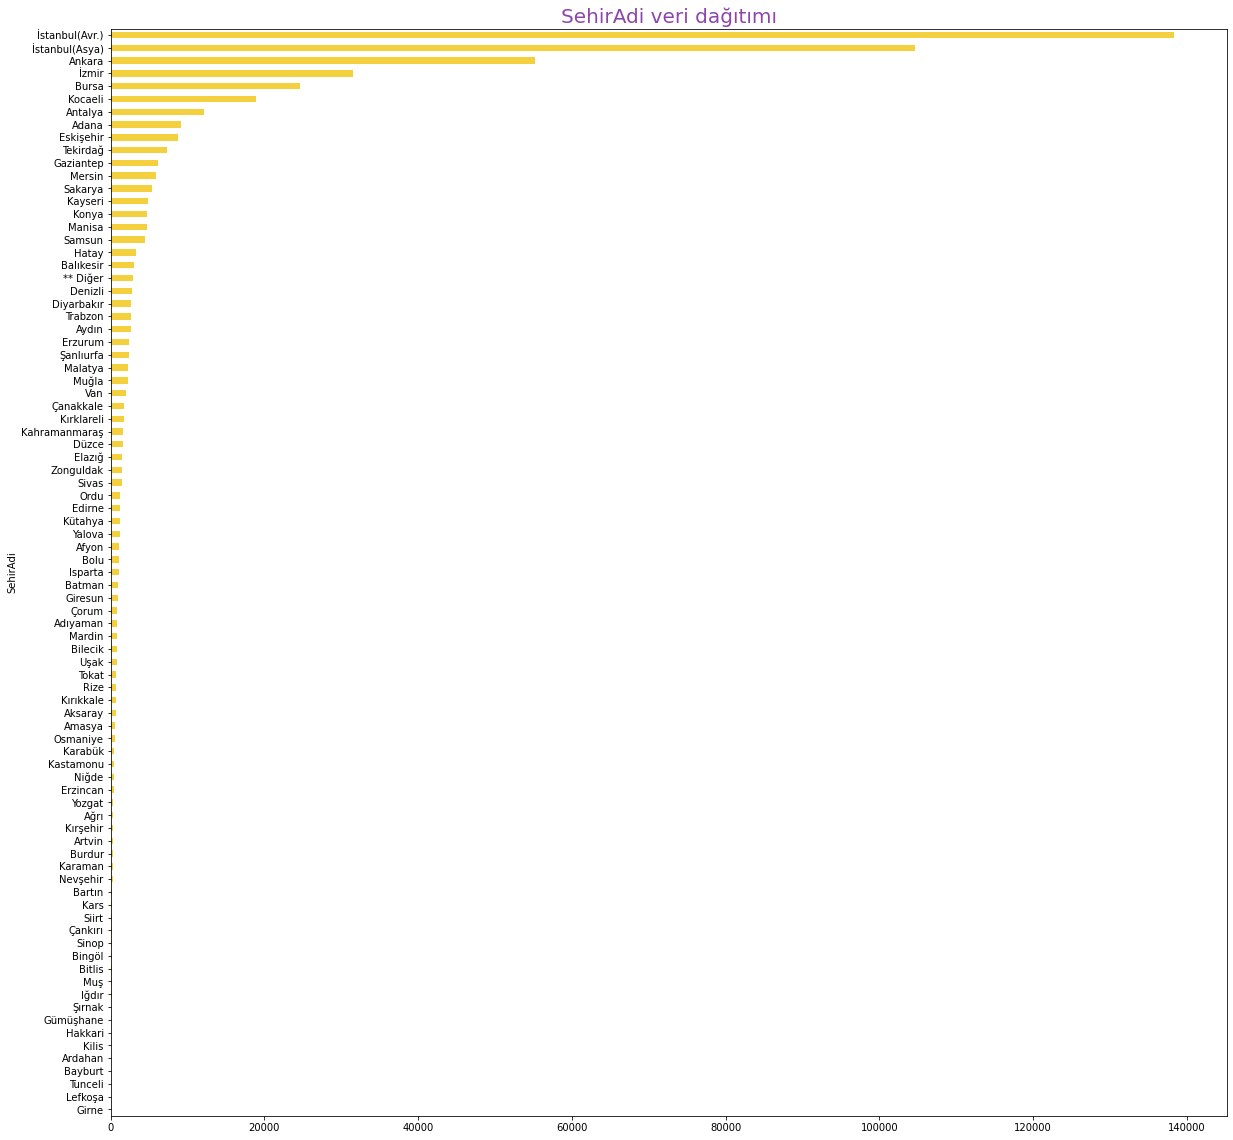

In [42]:
adaylar.groupby(["SehirAdi"])["SehirAdi"].count().sort_values().plot.barh(figsize=(20,20), color="#F4D03F")
plt.title("SehirAdi veri dağıtımı", color="#8E44AD", fontsize=20)

Text(0.5, 1.0, 'BitisYili veri dağıtımı')

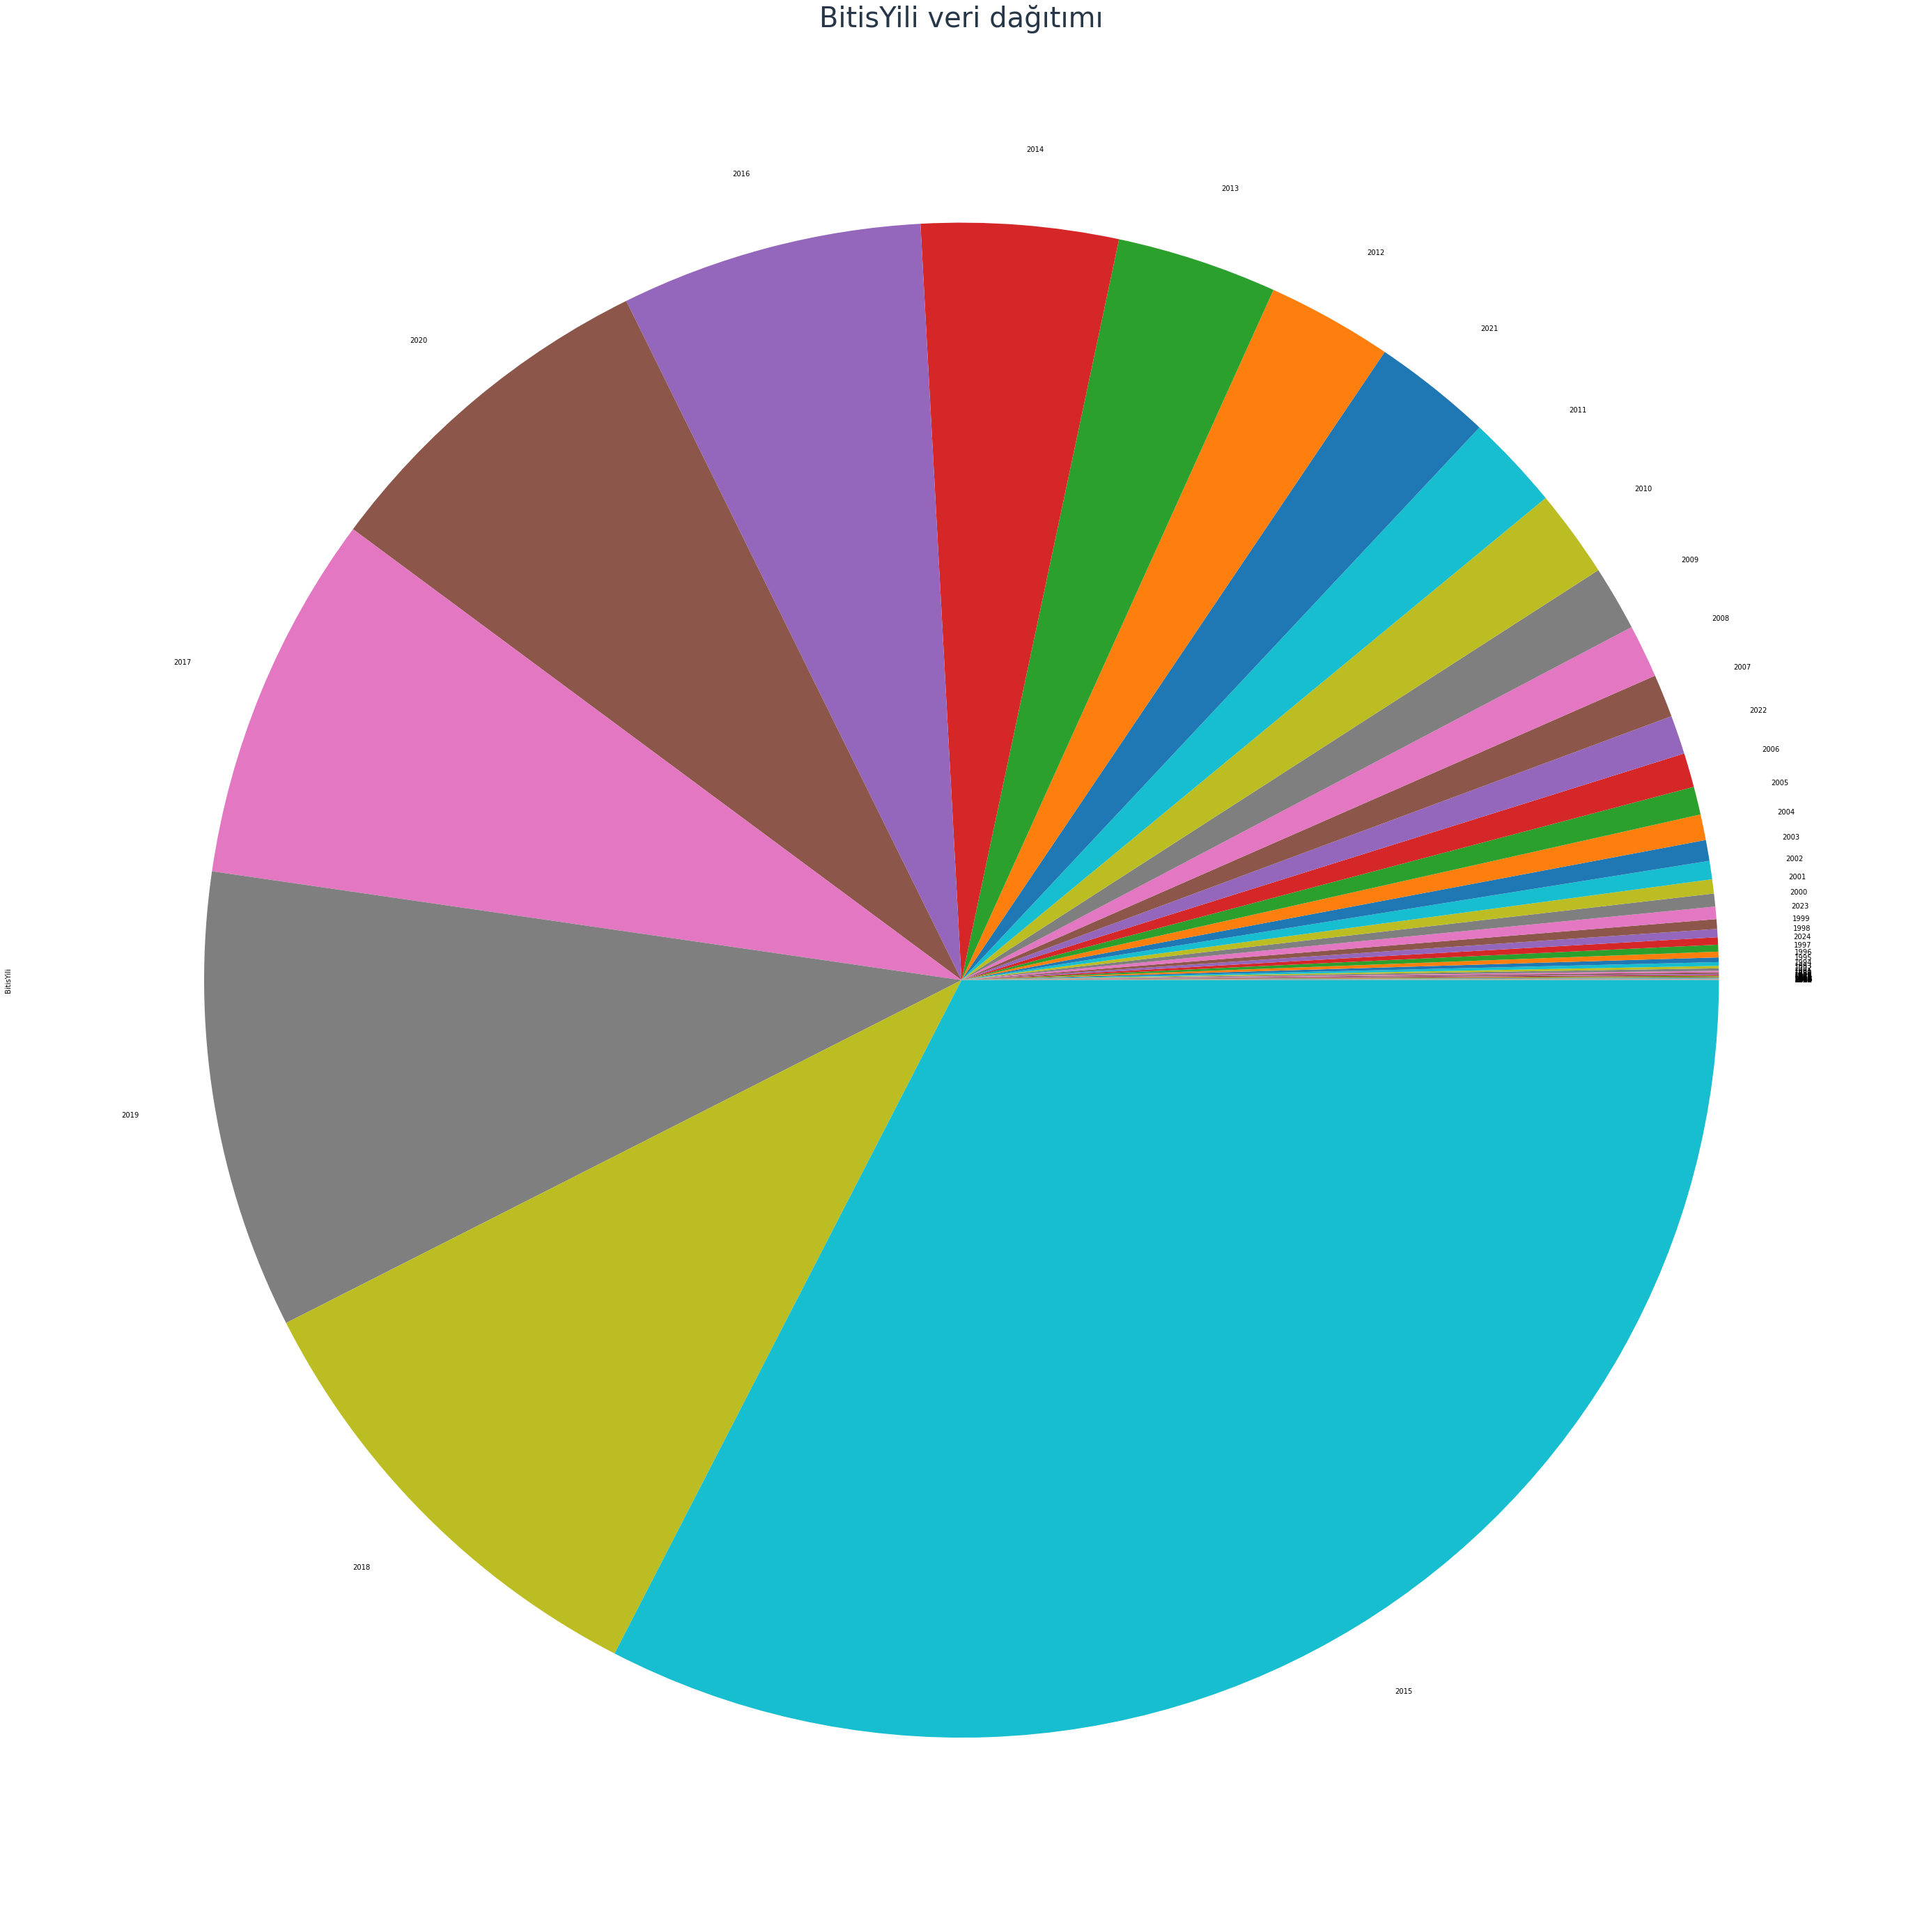

In [43]:
adaylar.groupby(["BitisYili"])["BitisYili"].count().sort_values().plot.pie(figsize=(50,50))
plt.title("BitisYili veri dağıtımı",fontsize=40, color="#283747")

Text(0.5, 1.0, 'Tip veri dağıtımı')

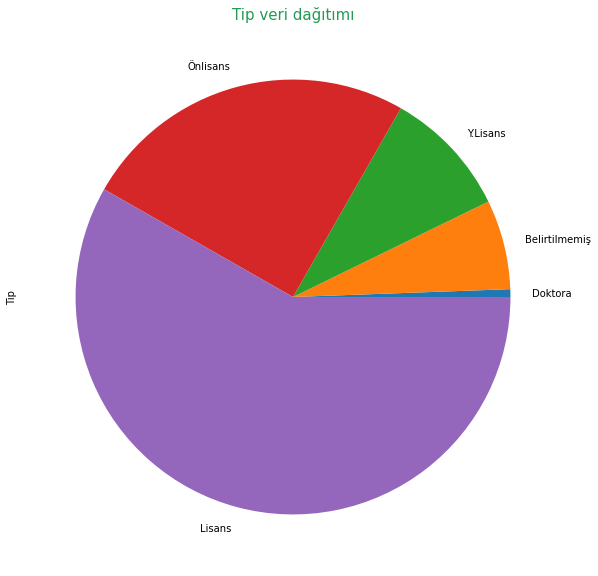

In [44]:
adaylar.groupby(["Tip"])["Tip"].count().sort_values().plot.pie(figsize=(10,10))
plt.title("Tip veri dağıtımı",fontsize=15, color="#239B56")

# <span style="color:#52127F">Başvuru verisetini keşfetmek 🔍 ve Aday veriseti ile birleştirmek 🧬 </span>
<center><img src="https://i2.wp.com/thedatascienceportal.com/wp-content/uploads/2020/11/1_wK8k8Vo8_c6jdYIjUWL_Pw.png?fit=1400%2C700&ssl=1" width=700></center>

In [45]:
print(basvurlar.head())
print(basvurlar.shape)

     AdayId   ilanId
0  13637708  2303237
1  13656061  2632097
2   2709620  2575647
3   2758694  2468668
4   2625700  2269574
(1059460, 2)


In [46]:
print(basvurlar.isnull().sum())

AdayId    0
ilanId    0
dtype: int64


In [47]:
print(basvurlar.dtypes)

AdayId    int64
ilanId    int64
dtype: object


In [48]:
tum_veriler= pd.merge(left=adaylar, right=basvurlar, left_on='AdayId', right_on='AdayId', how='outer')
tum_veriler

,AdayId,Tip,OkulId,BolumAdi,BitisYili,SehirAdi,ilanId
0,1096371,Lisans,63,Bilgisayar,2004,İstanbul(Avr.),2416528
1,1096371,Lisans,63,Bilgisayar,2004,İstanbul(Avr.),2416437
2,1096371,Lisans,63,Bilgisayar,2004,İstanbul(Avr.),2269574
3,1096371,Lisans,63,Bilgisayar,2004,İstanbul(Avr.),2407337
4,1096371,Lisans,63,Bilgisayar,2004,İstanbul(Avr.),2432999
...,...,...,...,...,...,...,...
1634909,22742218,Önlisans,43,Bilgisayar,2015,Balıkesir,2426453
1634910,22742218,Önlisans,43,Bilgisayar,2015,Balıkesir,2409711
1634911,16377536,Önlisans,2,Bankacılık,2015,Ankara,2409711
1634912,16377536,Lisans,36,Muhasebe,2020,Ankara,2409711


# <span style="color:#52127F">İlanlar verisetini keşfetmek ve hazırlamak 🔍 🗂 </span>
<center><img src="https://mk0dataladdercosmmxl.kinstacdn.com/wp-content/uploads/2020/06/data-cleaning-tool-scaled.jpg" width=700></center>

In [49]:
ilanlar

,ilanMetni,Nitelikler,lokasyon,IlanId,sektorAdi,pozisyonAdi
0,OT015 Endüstri Mühendisi \tAR-GE / Sürekli...,\r\n<h3>GENEL NİTELİKLER</h3>\r\n<h3>\r\n<p><s...,Denizli,1243402,Tekstil,Bilgisayar Mühendisi
1,APPDEV0418 Devam eden ve planlanan Proje...,\r\n<p>Üniversitelerin ilgili&nbsp; bölümlerin...,Ankara,2026933,Bilişim,Kıdemli Yazılım Uzmanı
2,AFAGY-06 AR-GE FARMASÖTİK ANALİTİK GELİŞTİRME ...,Gebze-Dilovası’nda yeni kurulan Üretim ve AR-G...,Kocaeli,2077585,Sağlık,Analitik Geliştirme Analisti
3,GLB-VMDANK Veri Merkezi Destek Uzmanı ( ) ...,<ul><li>Üniversite ya da Meslek Yüksek Okullar...,Ankara,2080243,Bilişim,Veri Merkezi Uzmanı
4,GLB-VMDANK Veri Merkezi Destek Uzmanı ( ) ...,<ul><li>Üniversite ya da Meslek Yüksek Okullar...,Ankara,2080243,Danışmanlık,Veri Merkezi Uzmanı
...,...,...,...,...,...,...
2939,"RF-BT07 İstanbul(Avr.),Yalova,Gaziantep <p...",<p>Holdingimizin&nbsp;<span>&nbsp;Beşiktaş/İst...,"İstanbul(Avr.),Yalova,Gaziantep,İzmir",2752333,Otomotiv,Sistem Destek Uzmanı
2940,"RF-BT07 İstanbul(Avr.),Yalova,Gaziantep <p...",<p>Holdingimizin&nbsp;<span>&nbsp;Beşiktaş/İst...,"İstanbul(Avr.),Yalova,Gaziantep,İzmir",2752333,Tekstil,Sistem Destek Uzmanı
2941,RF-WE46322 \t <p></p><ul><li><span>Üniver...,<p></p><ul><li><span>Üniversitelerin Bilgisaya...,İstanbul(Avr.),2752371,Bilişim,Bilgi İşlem Sorumlusu
2942,RF-WE46322 \t <p></p><ul><li><span>Üniver...,<p></p><ul><li><span>Üniversitelerin Bilgisaya...,İstanbul(Avr.),2752371,Sağlık,Bilgi İşlem Sorumlusu


In [50]:
ilanlar.columns

Index(['ilanMetni', 'Nitelikler', 'lokasyon', 'IlanId', 'sektorAdi',
       'pozisyonAdi'],
      dtype='object')

In [51]:
ilanlar.dtypes

ilanMetni      object
Nitelikler     object
lokasyon       object
IlanId          int64
sektorAdi      object
pozisyonAdi    object
dtype: object

In [52]:
ilanlar.isnull().sum()

ilanMetni       0
Nitelikler      0
lokasyon        2
IlanId          0
sektorAdi      89
pozisyonAdi     0
dtype: int64

In [53]:
lokasiyonlar= ilanlar['lokasyon'].unique()
for i in lokasiyonlar:
    print(i, end=" ||| ")
    
print("\n",len(lokasiyonlar))

Denizli ||| Ankara ||| Kocaeli ||| İstanbul(Asya),Kocaeli ||| İstanbul(Asya) ||| İstanbul(Avr.) ||| Kocaeli, İstanbul(Asya) ||| Muğla ||| Konya ||| İzmir ||| Tekirdağ ||| Ankara, İstanbul(Avr.), İstanbul(Asya) ||| Bursa ||| Kırklareli,Tekirdağ ||| İstanbul(Asya),İstanbul(Avr.) ||| İstanbul(Avr.), İstanbul(Asya) ||| Sakarya ||| Türkiye, İstanbul(Avr.) ||| Kırklareli ||| İstanbul(Avr.), Kocaeli, İstanbul(Asya) ||| Manisa ||| Antalya ||| Eskişehir ||| Aydın,Manisa,Muğla,Ankara,Eskişehir,İzmir,Bursa,Konya,İstanbul(Asya),İstanbul(Avr.),Antalya,Mersin,Kocaeli,Trabzon,Sakarya,Yalova,Adana,Şanlıurfa,Hatay,Balıkesir,Denizli,Isparta,Rize,Sivas ||| Mersin ||| Ankara, Eskişehir ||| Ankara, İstanbul(Avr.), İzmir, İstanbul(Asya) ||| Adana, İstanbul(Avr.), İstanbul(Asya) ||| Aydın,Ankara ||| Ağrı ||| İstanbul(Avr.),İzmir ||| Samsun ||| İzmir, Manisa ||| Kayseri ||| Gaziantep ||| İstanbul(Avr.),İstanbul(Asya) ||| Kocaeli,İstanbul(Asya),İstanbul(Avr.) ||| Malatya ||| İzmir,Manisa ||| Adana, Ankara, Ant

## <span style="color:#256609">Şimdi pozisyonAdi Değişterlim(sadece pozsiyonun ilk kelimesini alalım) !!</span>

In [54]:
pozisiyonlar = ilanlar['pozisyonAdi'].unique()
print(len(pozisiyonlar))

323


In [55]:
for i in pozisiyonlar:
    x= i.split()
    ilanlar["pozisyonAdi"]=ilanlar["pozisyonAdi"].replace(i, x[0])
                
print(ilanlar["pozisyonAdi"].unique())
print(len(ilanlar["pozisyonAdi"].unique()),"Farklı pozisyon")

['Bilgisayar' 'Kıdemli' 'Analitik' 'Veri' 'Bilgi' 'Web' 'Yazılım'
 'Konfigürasyon' 'Sistem' 'Teknoloji' 'Arama' 'Animasyon' 'Bayi' 'Grafik'
 'Java' '3D' 'Yönetim' 'Grafiker' 'İş' 'SAP' 'Analist' 'Kullanıcı' 'BT'
 'ASP.Net' 'IT' 'Gömülü' 'Network' 'Ağ' 'Dizgi' 'Görsel' 'Orta' 'Oyun'
 'İOS' 'Uygulama' 'Junior' 'Software' 'Mobil' 'Netsis' 'PHP' 'ERP'
 'Coğrafi' 'Arayüz' 'Veritabanı' 'Entegre' 'Logo' 'Uzman' 'Hareketli'
 'Linux' 'Entegrasyon' 'İnovasyon' 'Kalite' 'Bilgisayarlı' 'Asp.net'
 'Donanım' 'Teknolog' 'Yalın' 'Sharepoint' 'Lisanslama' 'Oracle' 'Data'
 'Stajyer' 'Scrum' 'MIS' 'Tasarımcı' 'Dijital' 'Test' 'SQL' 'C#'
 'Photoshop' 'Bilişim' 'Webhosting' 'İnfo' 'Admin' 'Notebook' 'Toplam'
 'Dizgici']
76 Farklı pozisyon


## <span style="color:#05D68D">Null(boş değerleri) ile uğraşmak 🕳</span>

## <span style="color:#CB9510">İlk olarak lokasyon 'Ankara' ile dolduralım </span>

In [56]:
for i in range(len(ilanlar)):
    if str(ilanlar['lokasyon'][i]) =="nan":
        ilanlar['lokasyon'][i]=ilanlar['lokasyon'][i]=="Ankara"

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## <span style="color:#CB9510">Şimdi sektorAdi PozisyonAdi'ni kullanarak dodlduralım</span>

In [57]:
print(ilanlar['sektorAdi'].unique())

['Tekstil' 'Bilişim' 'Sağlık' 'Danışmanlık' 'Hizmet' 'Telekomünikasyon'
 'Otomotiv' 'Kimya' 'Eğitim' 'Sigortacılık' 'Ticaret' 'Turizm'
 'Topluluklar' 'Elektrik & Elektronik' 'Taşımacılık' 'Medya'
 'Reklam ve Tanıtım' 'Perakende' 'Mobilya & Aksesuar'
 'Ofis / Büro Malzemeleri' 'Yapı' 'Bilgi Teknolojileri' 'Denizcilik'
 'Maden ve Metal Sanayi' 'Üretim / Endüstriyel Ürünler'
 'Hızlı Tüketim Malları' 'Finans - Ekonomi' nan 'Gıda' 'Güvenlik' 'Diğer'
 'Ev Eşyaları' 'Havacılık' 'Enerji' 'Orman Ürünleri'
 'Eğlence - Kültür - Sanat' 'Dayanıklı Tüketim Ürünleri' 'Tarım / Ziraat'
 'Basım - Yayın' 'Hayvancılık' 'Çevre' 'Arşiv Yönetimi ve Saklama'
 'Organizasyon' 'Otoyol, Tünel ve Köprü İşletmeciliği'
 'İletişim Danışmanlığı']


In [58]:
bos_sektorlar= ilanlar.loc[ilanlar['sektorAdi'].isnull()==True]

In [59]:
pozisyonular= []
for i in bos_sektorlar["pozisyonAdi"]:
    if i not in pozisyonular and str(i) != "nan":
        pozisyonular.append(i)
        
pozisyonular.sort()
print(pozisyonular)

['ASP.Net', 'Admin', 'Analist', 'Arama', 'BT', 'Bilgi', 'Bilgisayar', 'Donanım', 'ERP', 'Grafik', 'Grafiker', 'Gömülü', 'Görsel', 'IT', 'Java', 'Kıdemli', 'Linux', 'Lisanslama', 'Mobil', 'SAP', 'Sistem', 'Stajyer', 'Veri', 'Web', 'Yazılım', 'İş']


In [60]:
pozisyon_sektor={}
for i in range(len(ilanlar)):
    if ilanlar["pozisyonAdi"][i] in pozisyonular and str(ilanlar["sektorAdi"][i]) != "nan":
        if ilanlar["pozisyonAdi"][i] not in pozisyon_sektor.keys():
            pozisyon_sektor[ilanlar["pozisyonAdi"][i]]=ilanlar["sektorAdi"][i]


In [61]:
print(pozisyon_sektor)

{'Bilgisayar': 'Tekstil', 'Kıdemli': 'Bilişim', 'Veri': 'Bilişim', 'Bilgi': 'Otomotiv', 'Web': 'Kimya', 'Yazılım': 'Eğitim', 'Sistem': 'Otomotiv', 'Arama': 'Medya', 'Grafik': 'Reklam ve Tanıtım', 'Java': 'Bilişim', 'Grafiker': 'Topluluklar', 'İş': 'Tekstil', 'SAP': 'Tekstil', 'Analist': 'Finans - Ekonomi', 'BT': 'Finans - Ekonomi', 'ASP.Net': 'Sigortacılık', 'IT': 'Ticaret', 'Gömülü': 'Bilişim', 'Görsel': 'Tekstil', 'Mobil': 'Taşımacılık', 'ERP': 'Bilişim', 'Linux': 'Enerji', 'Donanım': 'Bilişim', 'Lisanslama': 'Enerji', 'Stajyer': 'Mobilya & Aksesuar'}


In [62]:
for k in range(len(ilanlar)):
    if str(ilanlar["sektorAdi"][k]) == "nan":
        for i, j in pozisyon_sektor.items():
            if ilanlar["pozisyonAdi"][k] == i:
                if str(j)=="nan":
                    ilanlar["sektorAdi"][k] = j

print(ilanlar["sektorAdi"].isnull().sum())

89


### <span style="color:blue">Bu şekilde sadece 1 tane Null kaldı onu Bilişim olarak dolduralım </span>

In [63]:
ilanlar["sektorAdi"]= ilanlar["sektorAdi"].fillna("Bilişim")
print(ilanlar["sektorAdi"].isnull().sum())

0


In [64]:
sektorlar = ilanlar['sektorAdi'].unique()
sektorlar_sozlugu={}
for i in sektorlar:
    x = str(i).split()
    sektorlar_sozlugu[i] = x[0]
    

In [65]:
ilanlar['sektorAdi'] = ilanlar['sektorAdi'].replace(sektorlar_sozlugu)

# <span style="color:#52127F">İlanlar verisetini Göreselleştirmek 📊</span>
<center><img src="https://miro.medium.com/max/1200/0*uoJhp9fB0xlgfLN7.png" width=700></center>

Text(0.5, 1.0, 'sektorAdi veri dağıtımı')

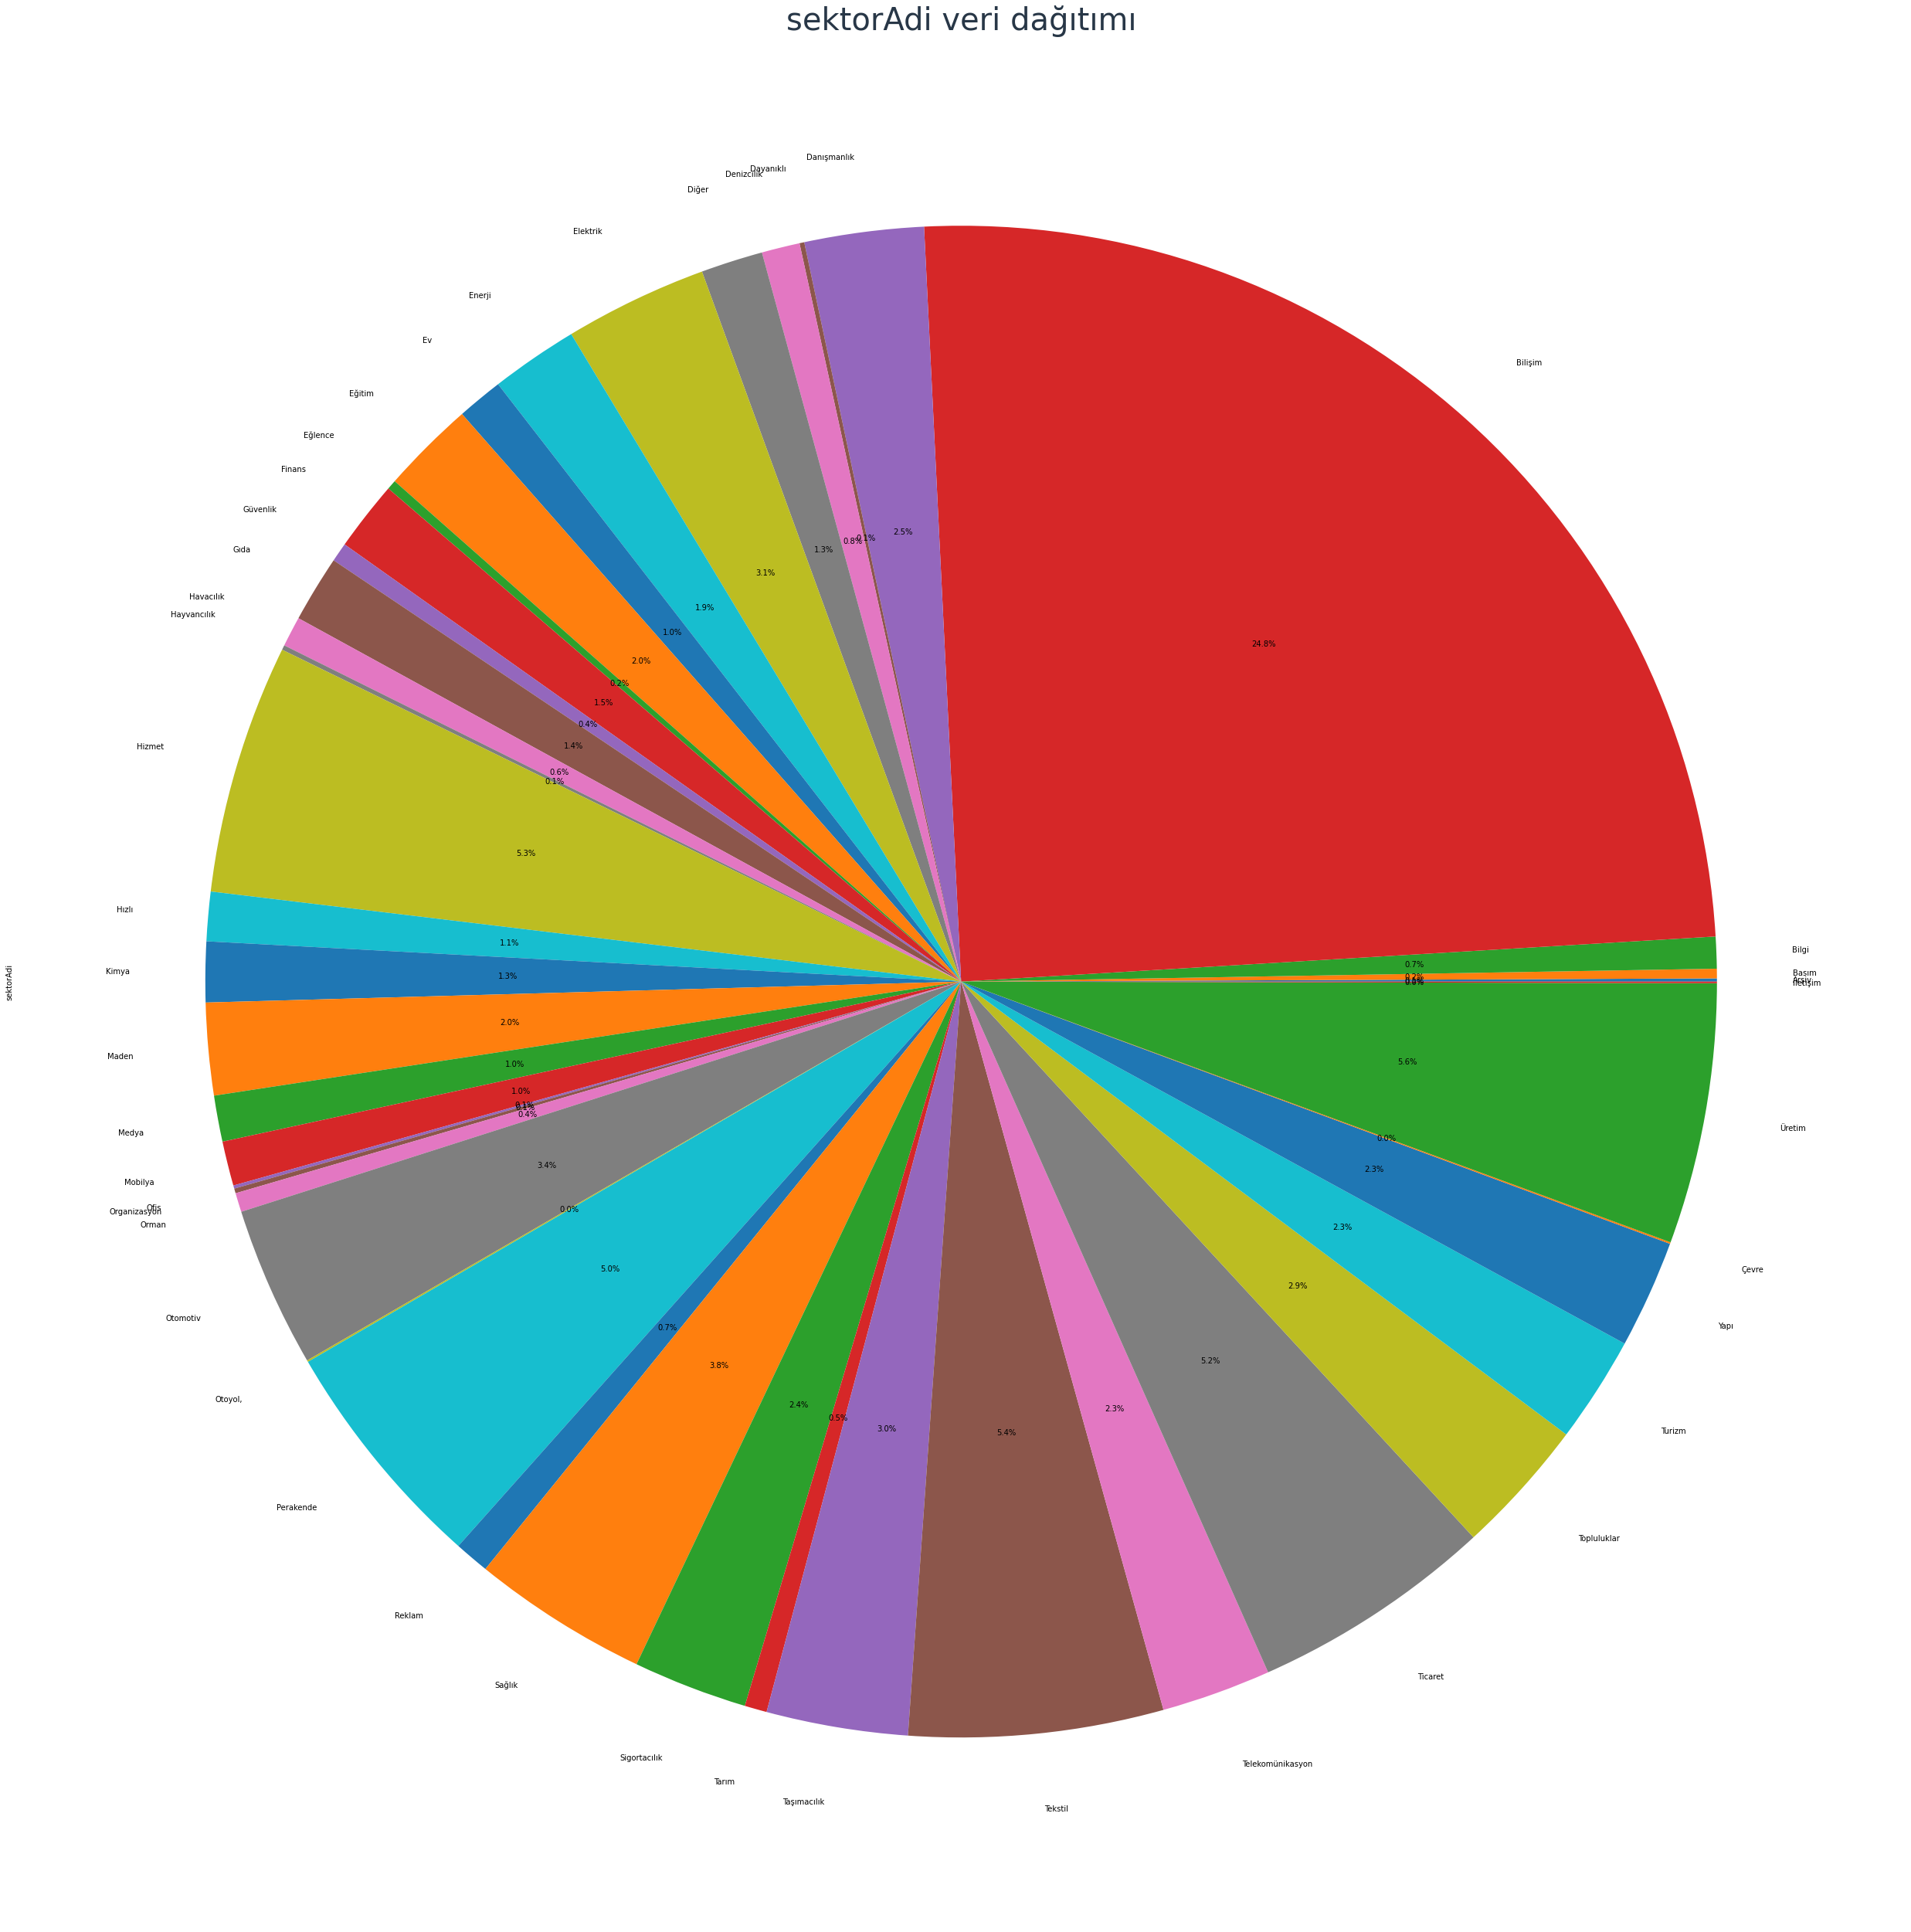

In [66]:
ilanlar.groupby(["sektorAdi"])["sektorAdi"].count().plot.pie(figsize=(45,45),autopct="%1.1f%%")
plt.title("sektorAdi veri dağıtımı",fontsize=40, color="#283747")

Text(0.5, 1.0, 'pozisyonAdi veri dağıtımı')

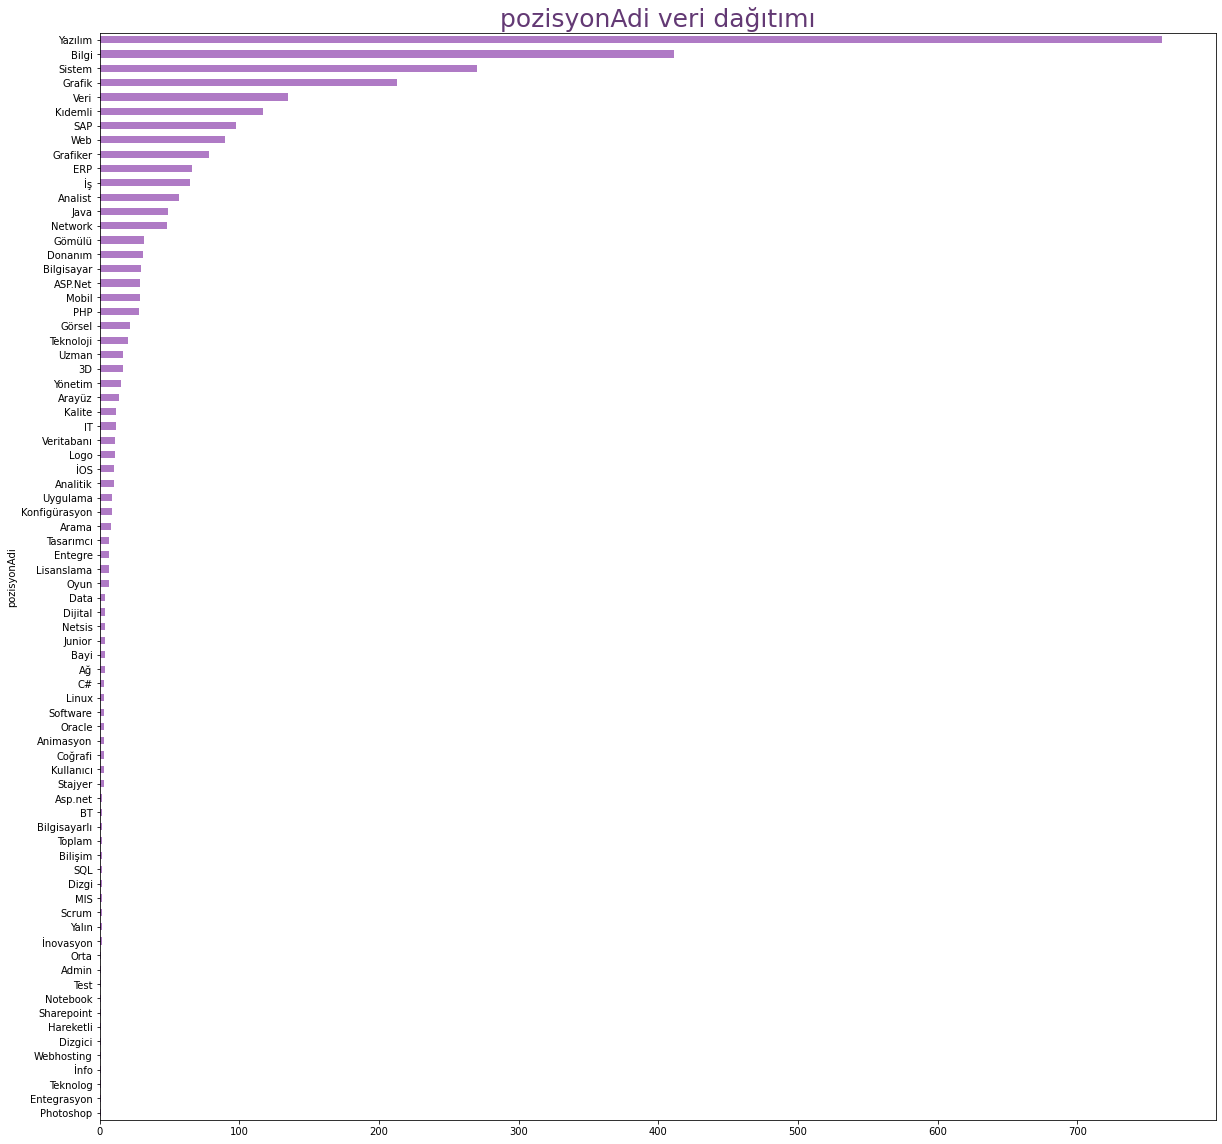

In [67]:
ilanlar.groupby(["pozisyonAdi"])["pozisyonAdi"].count().sort_values().plot.barh(figsize=(20,20), color="#AF7AC5")
plt.title("pozisyonAdi veri dağıtımı",fontsize=25, color="#633974")

In [68]:
tum_veriler= pd.merge(left=tum_veriler, right=ilanlar, left_on='ilanId', right_on='IlanId', how='outer')
tum_veriler

,AdayId,Tip,OkulId,BolumAdi,BitisYili,SehirAdi,ilanId,ilanMetni,Nitelikler,lokasyon,IlanId,sektorAdi,pozisyonAdi
0,1096371,Lisans,63,Bilgisayar,2004,İstanbul(Avr.),2416528,MBTERPGMD1 <p><span>1978 yılında kurulmu...,"<p><span>1978 yılında kurulmuş olan ŞENPİLİÇ, ...",İstanbul(Asya),2416528,Hızlı,ERP
1,1096371,Y.Lisans,8,Yönetim,2008,İstanbul(Avr.),2416528,MBTERPGMD1 <p><span>1978 yılında kurulmu...,"<p><span>1978 yılında kurulmuş olan ŞENPİLİÇ, ...",İstanbul(Asya),2416528,Hızlı,ERP
2,126206,Lisans,187,Bilgisayar,2003,İstanbul(Asya),2416528,MBTERPGMD1 <p><span>1978 yılında kurulmu...,"<p><span>1978 yılında kurulmuş olan ŞENPİLİÇ, ...",İstanbul(Asya),2416528,Hızlı,ERP
3,126206,Önlisans,78,Bilgisayar,1990,İstanbul(Asya),2416528,MBTERPGMD1 <p><span>1978 yılında kurulmu...,"<p><span>1978 yılında kurulmuş olan ŞENPİLİÇ, ...",İstanbul(Asya),2416528,Hızlı,ERP
4,64553,Lisans,6,İşletme,1986,İstanbul(Asya),2416528,MBTERPGMD1 <p><span>1978 yılında kurulmu...,"<p><span>1978 yılında kurulmuş olan ŞENPİLİÇ, ...",İstanbul(Asya),2416528,Hızlı,ERP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2239904,21085596,Lisans,74,Bilgisayar,2020,Amasya,2747157,"YKYU-001 <p class=""x_x_x_MsoNormal""><spa...","<p class=""x_x_x_MsoNormal""><span>Üniversiteler...",Ankara,2747157,Bilişim,Yazılım
2239905,21531628,Lisans,118,Elektrik/Elektronik,2019,Ankara,2747157,"YKYU-001 <p class=""x_x_x_MsoNormal""><spa...","<p class=""x_x_x_MsoNormal""><span>Üniversiteler...",Ankara,2747157,Bilişim,Yazılım
2239906,21531628,Lisans,13,Yönetim,2015,Ankara,2747157,"YKYU-001 <p class=""x_x_x_MsoNormal""><spa...","<p class=""x_x_x_MsoNormal""><span>Üniversiteler...",Ankara,2747157,Bilişim,Yazılım
2239907,17787322,Belirtilmemiş,11,Bilinmiyor,2015,Ankara,2747157,"YKYU-001 <p class=""x_x_x_MsoNormal""><spa...","<p class=""x_x_x_MsoNormal""><span>Üniversiteler...",Ankara,2747157,Bilişim,Yazılım


In [69]:
tum_veriler= tum_veriler.drop(["ilanMetni","Nitelikler","ilanId","BitisYili"], axis=1)
tum_veriler

,AdayId,Tip,OkulId,BolumAdi,SehirAdi,lokasyon,IlanId,sektorAdi,pozisyonAdi
0,1096371,Lisans,63,Bilgisayar,İstanbul(Avr.),İstanbul(Asya),2416528,Hızlı,ERP
1,1096371,Y.Lisans,8,Yönetim,İstanbul(Avr.),İstanbul(Asya),2416528,Hızlı,ERP
2,126206,Lisans,187,Bilgisayar,İstanbul(Asya),İstanbul(Asya),2416528,Hızlı,ERP
3,126206,Önlisans,78,Bilgisayar,İstanbul(Asya),İstanbul(Asya),2416528,Hızlı,ERP
4,64553,Lisans,6,İşletme,İstanbul(Asya),İstanbul(Asya),2416528,Hızlı,ERP
...,...,...,...,...,...,...,...,...,...
2239904,21085596,Lisans,74,Bilgisayar,Amasya,Ankara,2747157,Bilişim,Yazılım
2239905,21531628,Lisans,118,Elektrik/Elektronik,Ankara,Ankara,2747157,Bilişim,Yazılım
2239906,21531628,Lisans,13,Yönetim,Ankara,Ankara,2747157,Bilişim,Yazılım
2239907,17787322,Belirtilmemiş,11,Bilinmiyor,Ankara,Ankara,2747157,Bilişim,Yazılım


In [70]:
tum_veriler.isnull().sum()

AdayId         0
Tip            0
OkulId         0
BolumAdi       0
SehirAdi       0
lokasyon       0
IlanId         0
sektorAdi      0
pozisyonAdi    0
dtype: int64

# <span style="color:#52127F">Tecrube verisetini keşfetmek ve Birleştirmek 🔍 🗂  </span>
<center><img src="https://mk0dataladdercosmmxl.kinstacdn.com/wp-content/uploads/2020/05/data-scrubbing-2-scaled.jpg" width=700></center>

In [71]:
tecrube

,AdayId,SektorAdi,PozisyonAdi,CalismaAyi,Aciklama,AyrildigiYil
0,11580390,Elektrik & Elektronik,Proje Mühendisi,11.0,OSOS tabanlı proje geliştirme ve ürün destek m...,2016.0
1,758194,Hizmet,Stajyer,14.0,NaN,1997.0
2,758194,Ticaret,Mağaza Müdür Yardımcısı,58.0,MAĞAZANIN KASALARINDA VE MÜŞTERİ HİZMETLERİNİN...,2008.0
3,758194,Basım - Yayın,Depo Sorumlusu,41.0,"STOK VE CARI HESAPLARIN TUTULMASI, DEPONUN İŞL...",2000.0
4,758194,Finans - Ekonomi,Sorumlu Yönetici,130.0,NaN,2019.0
...,...,...,...,...,...,...
1322854,25863090,Finans - Ekonomi,Banka Asistanı,1.0,NaN,2019.0
1322855,17873631,Kimya,Araştırma Geliştirme / Arge Stajyeri,1.0,"<p>Plastic Raw Material Production Processes, ...",2017.0
1322856,17873631,Üretim / Endüstriyel Ürünler,Stajyer Mühendis,1.0,NaN,2017.0
1322857,17873631,Hizmet,Stajyer Mühendis,3.0,Simülasyon Ar-Ge. San. Tic. Ltd. Şti.\n\n\n\n...,2017.0


In [72]:
tecrube.dtypes

AdayId            int64
SektorAdi        object
PozisyonAdi      object
CalismaAyi      float64
Aciklama         object
AyrildigiYil    float64
dtype: object

In [73]:
tecrube.columns

Index(['AdayId', 'SektorAdi', 'PozisyonAdi', 'CalismaAyi', 'Aciklama',
       'AyrildigiYil'],
      dtype='object')

In [74]:
tecrube = tecrube.drop(['Aciklama','AyrildigiYil'], axis=1)

In [75]:
tecrube.isnull().sum()

AdayId             0
SektorAdi      42832
PozisyonAdi    17945
CalismaAyi     17064
dtype: int64

In [76]:
# null Çalışma Ayında 12 olarak dolduralım
tecrube['CalismaAyi'] = tecrube['CalismaAyi'].fillna(12)

In [77]:
Sektorlar = tecrube['SektorAdi'].unique()
sektorlar_sozluk={}
for i in Sektorlar:
    x = str(i).split()
    sektorlar_sozluk[i] = x[0]

In [78]:
print(sektorlar_sozluk)

{'Elektrik & Elektronik': 'Elektrik', 'Hizmet': 'Hizmet', 'Ticaret': 'Ticaret', 'Basım - Yayın': 'Basım', 'Finans - Ekonomi': 'Finans', 'Otomotiv': 'Otomotiv', 'Bilişim': 'Bilişim', 'Diğer': 'Diğer', 'Telekomünikasyon': 'Telekomünikasyon', 'Tekstil': 'Tekstil', 'Üretim / Endüstriyel Ürünler': 'Üretim', 'Sağlık': 'Sağlık', 'Reklam ve Tanıtım': 'Reklam', 'Yapı': 'Yapı', 'Tarım / Ziraat': 'Tarım', 'Kimya': 'Kimya', 'Enerji': 'Enerji', 'Bilgi Teknolojileri': 'Bilgi', 'Topluluklar': 'Topluluklar', 'Sigortacılık': 'Sigortacılık', 'Perakende': 'Perakende', 'Danışmanlık': 'Danışmanlık', 'Maden ve Metal Sanayi': 'Maden', 'Ev Eşyaları': 'Ev', 'Eğitim': 'Eğitim', 'Turizm': 'Turizm', 'Havacılık': 'Havacılık', 'Gıda': 'Gıda', 'Mobilya & Aksesuar': 'Mobilya', 'Hızlı Tüketim Malları': 'Hızlı', 'Denizcilik': 'Denizcilik', nan: 'nan', 'Taşımacılık': 'Taşımacılık', 'Medya': 'Medya', 'Ofis / Büro Malzemeleri': 'Ofis', 'Güvenlik': 'Güvenlik', 'Dayanıklı Tüketim Ürünleri': 'Dayanıklı', 'Hayvancılık': 'Hayv

In [79]:
tecrube['SektorAdi'] = tecrube['SektorAdi'].replace(sektorlar_sozluk)

In [9]:
Pozisyonlar = tecrube['PozisyonAdi'].unique()
Pozisyonlar_sozuluk= {}

for i in Pozisyonlar:
    y = str(i).split()
    Pozisyonlar_sozuluk[i]= y[0]

In [10]:
tecrube['PozisyonAdi'] = tecrube['PozisyonAdi'].replace(Pozisyonlar_sozuluk)

In [80]:
tum_veriler= pd.merge(left=tum_veriler, right=tecrube, left_on='AdayId', right_on='AdayId', how='outer')
tum_veriler

,AdayId,Tip,OkulId,BolumAdi,SehirAdi,lokasyon,IlanId,sektorAdi,pozisyonAdi,SektorAdi,PozisyonAdi,CalismaAyi
0,1096371,Lisans,63,Bilgisayar,İstanbul(Avr.),İstanbul(Asya),2416528,Hızlı,ERP,Hızlı,Bilgi İşlem Müdürü,24.0
1,1096371,Lisans,63,Bilgisayar,İstanbul(Avr.),İstanbul(Asya),2416528,Hızlı,ERP,Bilişim,Proje Yöneticisi / Yönetmeni,52.0
2,1096371,Lisans,63,Bilgisayar,İstanbul(Avr.),İstanbul(Asya),2416528,Hızlı,ERP,Gıda,Bilgi İşlem Müdürü,28.0
3,1096371,Lisans,63,Bilgisayar,İstanbul(Avr.),İstanbul(Asya),2416528,Hızlı,ERP,Hizmet,Bilgi İşlem Müdürü,17.0
4,1096371,Lisans,63,Bilgisayar,İstanbul(Avr.),İstanbul(Asya),2416528,Hızlı,ERP,Kimya,Bilgi Teknolojileri / IT Yöneticisi,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10038121,18546910,Lisans,1495,Elektrik/Elektronik,Isparta,Ankara,2747157,Bilişim,Yazılım,Hizmet,Elektrik Elektronik Teknisyeni,7.0
10038122,18546910,Lisans,1495,Elektrik/Elektronik,Isparta,Ankara,2747157,Bilişim,Yazılım,Elektrik,Stajyer Mühendis,1.0
10038123,18546910,Lisans,1495,Elektrik/Elektronik,Isparta,Ankara,2747157,Bilişim,Yazılım,Otomotiv,Ustabaşı,57.0
10038124,18546910,Lisans,1495,Elektrik/Elektronik,Isparta,Ankara,2747157,Bilişim,Yazılım,Hizmet,Teknik Eleman,2.0


In [81]:
tum_veriler.isnull().sum()

AdayId             0
Tip                0
OkulId             0
BolumAdi           0
SehirAdi           0
lokasyon           0
IlanId             0
sektorAdi          0
pozisyonAdi        0
SektorAdi          0
PozisyonAdi    56071
CalismaAyi         0
dtype: int64

# <span style="color:#52127F">kabul_alan verisetini keşfetmek ve Birleştirmek 🔍 🗂  </span>
<center><img src="https://tanukamandal.com/wp-content/uploads/2018/05/data-preparation-1.png" width=700></center>

In [82]:
kabul_alan

,AdayId,ilanId
0,2693866,2435419
1,2699788,2331525
2,2759179,2455050
3,2759179,2107371
4,2804335,2225168
...,...,...
2861,25345818,2459452
2862,25347803,2422597
2863,25409897,2561928
2864,25410669,2512655


In [83]:
kabul_alan.isnull().sum()

AdayId    0
ilanId    0
dtype: int64

In [84]:
tum_veriler

,AdayId,Tip,OkulId,BolumAdi,SehirAdi,lokasyon,IlanId,sektorAdi,pozisyonAdi,SektorAdi,PozisyonAdi,CalismaAyi
0,1096371,Lisans,63,Bilgisayar,İstanbul(Avr.),İstanbul(Asya),2416528,Hızlı,ERP,Hızlı,Bilgi İşlem Müdürü,24.0
1,1096371,Lisans,63,Bilgisayar,İstanbul(Avr.),İstanbul(Asya),2416528,Hızlı,ERP,Bilişim,Proje Yöneticisi / Yönetmeni,52.0
2,1096371,Lisans,63,Bilgisayar,İstanbul(Avr.),İstanbul(Asya),2416528,Hızlı,ERP,Gıda,Bilgi İşlem Müdürü,28.0
3,1096371,Lisans,63,Bilgisayar,İstanbul(Avr.),İstanbul(Asya),2416528,Hızlı,ERP,Hizmet,Bilgi İşlem Müdürü,17.0
4,1096371,Lisans,63,Bilgisayar,İstanbul(Avr.),İstanbul(Asya),2416528,Hızlı,ERP,Kimya,Bilgi Teknolojileri / IT Yöneticisi,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10038121,18546910,Lisans,1495,Elektrik/Elektronik,Isparta,Ankara,2747157,Bilişim,Yazılım,Hizmet,Elektrik Elektronik Teknisyeni,7.0
10038122,18546910,Lisans,1495,Elektrik/Elektronik,Isparta,Ankara,2747157,Bilişim,Yazılım,Elektrik,Stajyer Mühendis,1.0
10038123,18546910,Lisans,1495,Elektrik/Elektronik,Isparta,Ankara,2747157,Bilişim,Yazılım,Otomotiv,Ustabaşı,57.0
10038124,18546910,Lisans,1495,Elektrik/Elektronik,Isparta,Ankara,2747157,Bilişim,Yazılım,Hizmet,Teknik Eleman,2.0


In [85]:
kabul_alan["Durum"]= np.ones((kabul_alan.shape[0],1)) 

In [86]:
tum_veriler= pd.merge(left=tum_veriler, right=kabul_alan, left_on=['AdayId','IlanId'], right_on=['AdayId','ilanId'], how='outer')

In [87]:
tum_veriler = tum_veriler.drop(['ilanId'], axis=1)

In [88]:
tum_veriler["Durum"]= tum_veriler["Durum"].fillna(0)

In [89]:
tum_veriler["PozisyonAdi"]= tum_veriler["PozisyonAdi"].fillna("Diğer")

In [90]:
tum_veriler.groupby("Durum").count()

,AdayId,Tip,OkulId,BolumAdi,SehirAdi,lokasyon,IlanId,sektorAdi,pozisyonAdi,SektorAdi,PozisyonAdi,CalismaAyi
Durum,,,,,,,,,,,,
0.0,10009325,10009325,10009325,10009325,10009325,10009325,10009325,10009325,10009325,10009325,10009325,10009325
1.0,28825,28825,28825,28825,28825,28825,28825,28825,28825,28825,28825,28825


In [91]:
tum_veriler

,AdayId,Tip,OkulId,BolumAdi,SehirAdi,lokasyon,IlanId,sektorAdi,pozisyonAdi,SektorAdi,PozisyonAdi,CalismaAyi,Durum
0,1096371,Lisans,63,Bilgisayar,İstanbul(Avr.),İstanbul(Asya),2416528,Hızlı,ERP,Hızlı,Bilgi İşlem Müdürü,24.0,0.0
1,1096371,Lisans,63,Bilgisayar,İstanbul(Avr.),İstanbul(Asya),2416528,Hızlı,ERP,Bilişim,Proje Yöneticisi / Yönetmeni,52.0,0.0
2,1096371,Lisans,63,Bilgisayar,İstanbul(Avr.),İstanbul(Asya),2416528,Hızlı,ERP,Gıda,Bilgi İşlem Müdürü,28.0,0.0
3,1096371,Lisans,63,Bilgisayar,İstanbul(Avr.),İstanbul(Asya),2416528,Hızlı,ERP,Hizmet,Bilgi İşlem Müdürü,17.0,0.0
4,1096371,Lisans,63,Bilgisayar,İstanbul(Avr.),İstanbul(Asya),2416528,Hızlı,ERP,Kimya,Bilgi Teknolojileri / IT Yöneticisi,69.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10038145,18546910,Lisans,1495,Elektrik/Elektronik,Isparta,Ankara,2747157,Bilişim,Yazılım,Hizmet,Elektrik Elektronik Teknisyeni,7.0,0.0
10038146,18546910,Lisans,1495,Elektrik/Elektronik,Isparta,Ankara,2747157,Bilişim,Yazılım,Elektrik,Stajyer Mühendis,1.0,0.0
10038147,18546910,Lisans,1495,Elektrik/Elektronik,Isparta,Ankara,2747157,Bilişim,Yazılım,Otomotiv,Ustabaşı,57.0,0.0
10038148,18546910,Lisans,1495,Elektrik/Elektronik,Isparta,Ankara,2747157,Bilişim,Yazılım,Hizmet,Teknik Eleman,2.0,0.0


In [92]:
tum_veriler.isnull().sum()

AdayId         0
Tip            0
OkulId         0
BolumAdi       0
SehirAdi       0
lokasyon       0
IlanId         0
sektorAdi      0
pozisyonAdi    0
SektorAdi      0
PozisyonAdi    0
CalismaAyi     0
Durum          0
dtype: int64

<center><img src="https://media1.giphy.com/media/3ofT5yFjWxh15lsl0s/giphy.gif"> </center>